## Objective:
The purpose of this notebook is to help students who are interested in artificial intelligence (AI), especially in Games topic which is a very important topic in artificial intelligence. Games can be divided into many types according to the number of players and some other aspects.
This notebook is concerned with the competitive type of games that are played by two players competing against each other. This type of games can be represented and solved in AI using algorithms that lie under the topic of "Adversarial Search".
One of these algorithms is called Alpha-beta pruning which is considered a very important algorithm due to its ability to solve competitive zero-sum game in less time and space. 
Because of the large size of the search tree in competitive games, the alpha-beta pruning algorithm was developed from the concept of the minimax algorithm to improve the searching process as it can reduce the size of the tree.
 

## Introduction to Alpha-beta pruning:

The Alpha-Beta pruning algorithm is similar to minimax algorithm in that both algorithms can find the best player movement at a given state. The difference between The Alpha-Beta pruning algorithm and minimax algorithm is that Alpha-Beta pruning can find the solution faster, since it can delete some branches of the tree that will not affect the end result.

### Game tree

- Represent the problem space for a game by a tree
- Nodes represent ‘board positions’, edges represent legal moves.
- A root node is the position in which a decision must be made.
- Evaluation function f  assigns real-number scores to board positions.
- Terminal nodes represent ways the game could end, labeled with the desirability of that ending (win or lose)

The evaluation function will be computed at the leaf nodes of the tree (or at a specified depth "horizon") in which:

- The searching process will continue until it reaches the end of the game and then determines who’s the winner. The searching process can also be done in a specified depth (horizon) instead of searching the whole tree to reduce the time and space.
- Evaluation function: if it is used at the end of the tree, it can determine the winning, losing or draw. And if it is used at a certain depth it can show how good the last state is to a player.

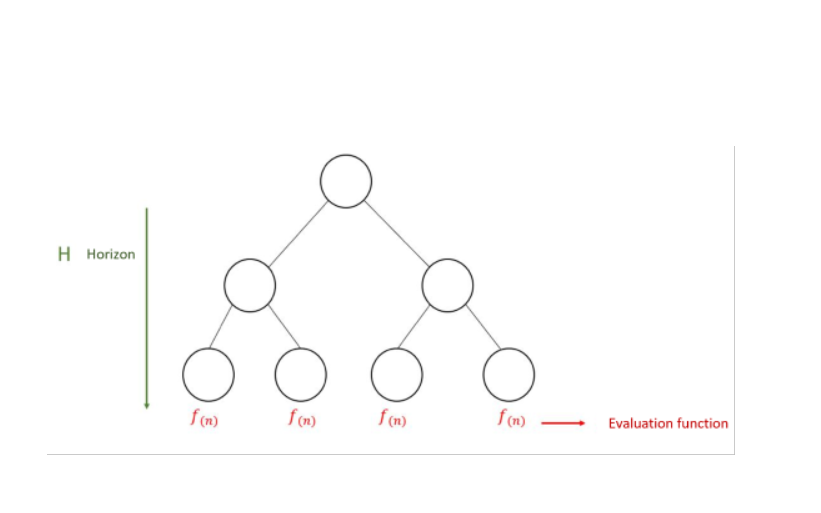

## An explanation of how Minimax works
#### a simple explanation to help you understand Alpha-Beta's pruning algorithm

The first player chooses the best option available to him, as the other player chooses the best option available to him as well
- The game tree is built to a specific horizon, which is H
- The evaluation function is calculated at each node in horizon H
- The Max node selects the highest value for the evaluation function from its child, the Min node selects the lowest value for the evaluation function from its child.

- The time complexity for the minimax algorithm = number of branches of the search tree (can be taken with the mean of the different branches in all levels of the search tree), with the power of depth of the search tree (number of levels)

- The space complexity for the minimax algorithm = number of branches of the search tree (it can be taken with the mean of the different branches in all levels of the search tree) raised by the exponent of the depth of the search tree (number of levels)



The Alpha-Beta algorithm works in the same way as the minimax algorithm but it is improved so that part of the search tree is cut and not searched, as it has no importance and will not be chosen.
This can be done by using two variables of this algorithm:

- Alpha: Lower-bound on the max node.

- Beta: Upper-bound on the min node.

The search tree will be cut at Min, max nodes if the condition is met (Alpha> = Beta).

the space complexity in the Alpha-Beta algorithm :

Worst case: no pruning, same as Minimax (O(bd))

Best case: when each player’s best move is the first option examined, you examine only O(bd/2) nodes, allowing you to search twice as deep!

### The figure shown below indicates that there is no need to calculate the last node from the right, so the tree will be cut off from the Max node due to the condition (7 <= 9) is applied.

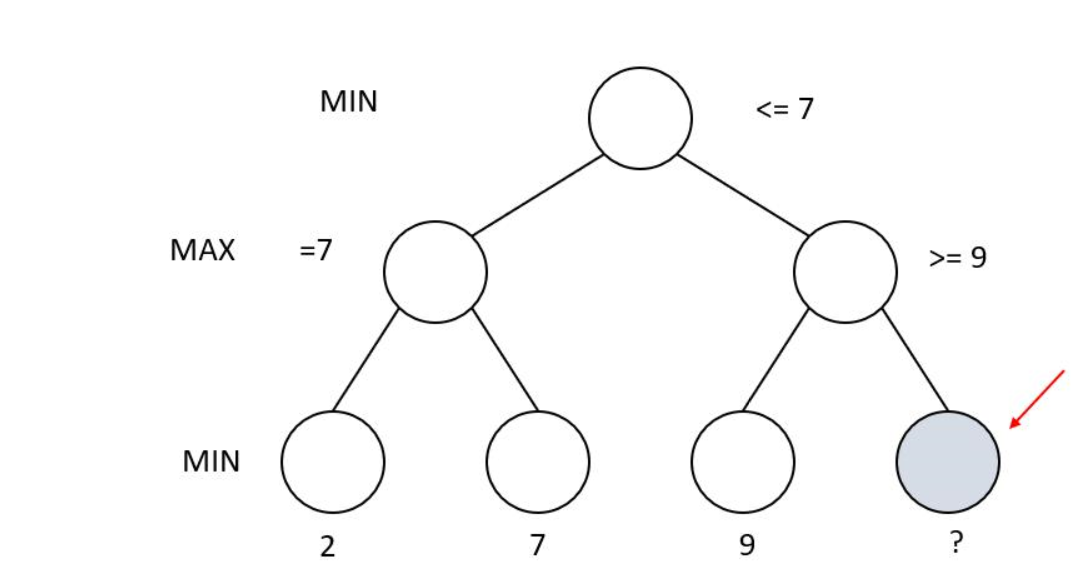

## An example of a game that can be solved using the Alpha-Beta pruning algorithm:
### 1- Game description

#### Shannon switching game:

The Shannon switching game is played by two people competing against each other to win the game. One of the players tries to reach the goal state and can color the path that he crosses from, the other player cuts paths from the graph so that the first player can not reach the goal state.
- The first player will consider a winner if he reaches the goal
- The second player will consider a winner when he cuts all possible paths that lead the first player to the goal state.

### 2- information about the game :
- Two players alternate moves
- Zero-sum: one player’s loss is another’s gain
- Perfect Information: each player knows the entire game state (observable environment)
- Deterministic: no element of chance
- Clear set of legal moves
- Well-defined outcomes (win, lose)



### 3-  problem formulation :

- initial state: a group of points connected by paths lead to the goal point.

- Goal state:

  1- The first player (short): reaching the goal point through the available paths.
  
  2- The second player (cut): cutting all the paths that lead the first player to reach the goal.
  
- actions: 

  1- The first player (short): moving from one state to another through paths.
  
  2- The second player (cut): cutting paths.
  
- Successor function: list of (move, state) pairs specifying legal moves.
  
- Terminal test: Is the game finished?

- Evaluation function: Gives numerical value of terminal states ( win (+1), lose (-1)). 



### 4- Game Evaluation Fucntion
#### We applied this game by searching the tree to the end to determine the winning and losing of the first player
But we suggest if you want to search in a specific depth to avoid complexity in time and space. You can calculate the evaluation function as follows:
- All possible paths to reach the goal in the game (all paths)
- The remaining paths to reach the goal after the second player cuts a path in each case (the remaining paths to reach the goal)

Evaluation equation = all paths - the remaining paths to reach the goal

The (cut) player chooses the highest value of the evaluation fucntion to choose the best path to be cuted , while the (short) player chooses the lowest value of the evaluation function to choose the best path to be colored.


#### other evaluation function that we tried but did not work:
evaluation function = number of all available paths in the current state - number of edges connected to the point that have colored edges.

### initial state space for our shannon switching game:
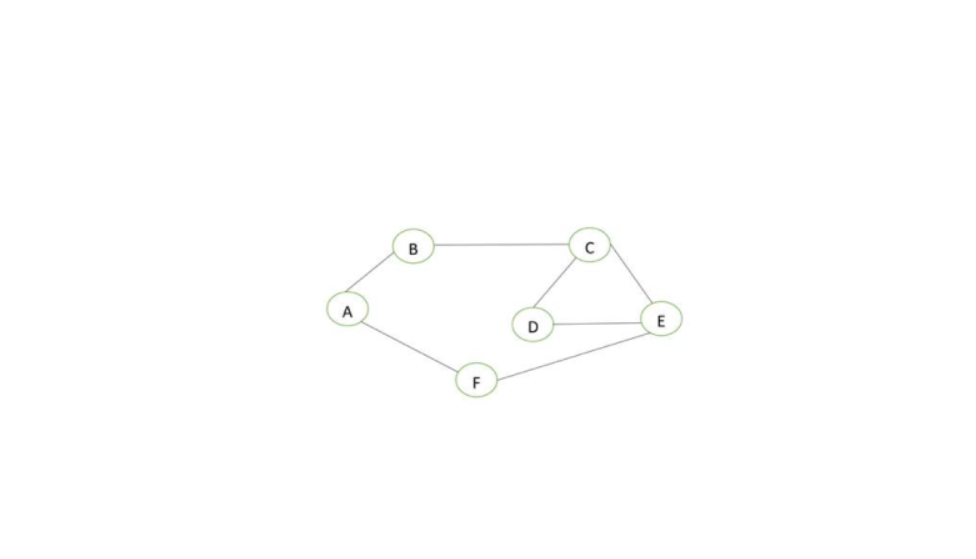

### A photo showing one case of the first player's "short" wins:

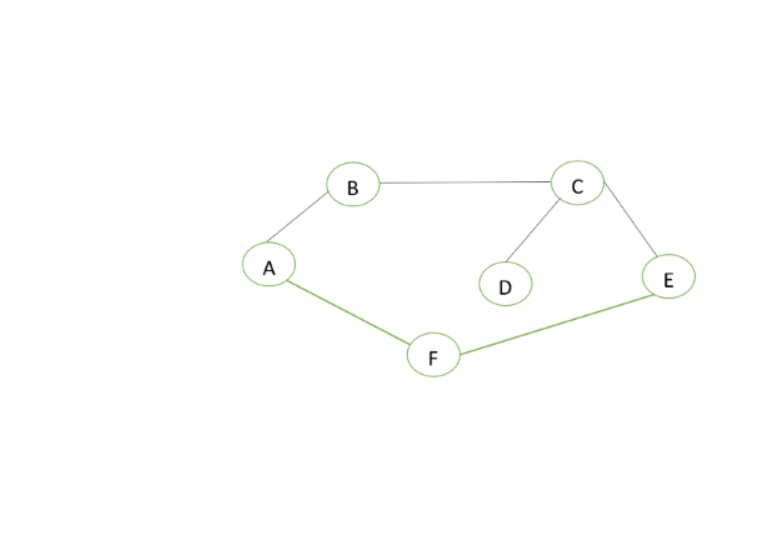

### A photo showing one of the second player's "cut" wins:

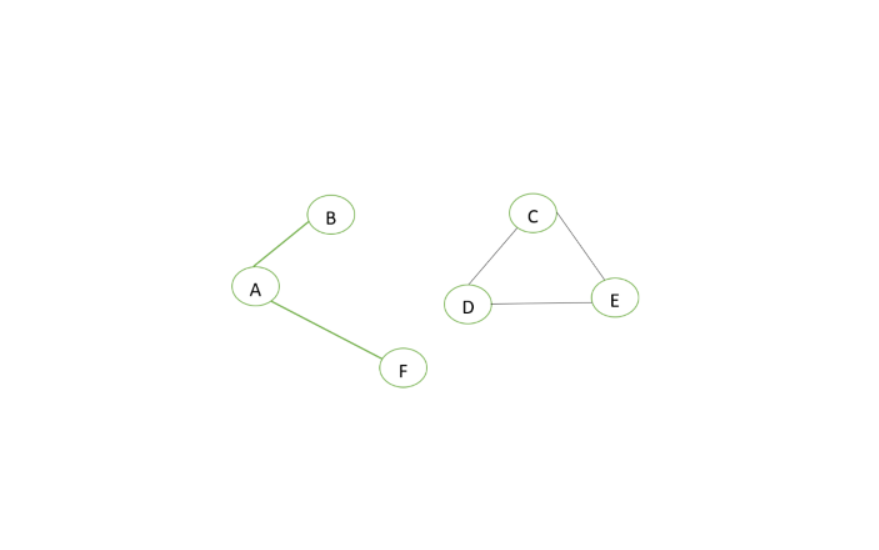

## How to implement the algorithm

we assume that: 
- the colored edge = 4
- the available edge = 5 
- the cuted edge = -3
- the unavailable edge = 0 

creat "vertex" class to represent each point, where it has the following attributes:

- "name" 
- "neighbors" list that stores a point's neighbors.
- "parent" 

"IsInNeighborsList" this method received point and chack whether that point is a neighbor or not.


In [1]:

class Vertex:

    def __init__(self, name, neighbors=[], parent=None ):
        self.name = name      
        self.neighbors=neighbors.copy()        
        self.parent=parent
        
        
    def IsInNeighborsList(self, node):
        for x in self.neighbors:
            if node==x.name:
                return True
            return False     

We used "Game" class to represent the game that has the following attributes:

- "dictionary", which is a type of list that we used to store a "Vertex" object and is accessed by the name of the point.

- "vertex_indices" is used to access the serial number in "current_state" and the serial number can be found using the point. name

- "visited" list, which specifies the points visited.

- "start" represents the starting point.

- "goal" represents the endpoint.

And the following functions:

- We used a constructor to initialize the game.

- "draw_current_state" This function used to print "current_state"

- "add_vertex" This function adds a point to the state. 

- "get_key" This function returns the name of the entered point.

- "initilizeIstherePath" This function gives the list "visited" and "result" initial values (false) and then calls the function "IstherePath".

- "IstherePath" This function works recursively and calculates whether there is a colored path between the starting point and the goal point then return (true or false).

- "initilizeIsthereNoPath" This function gives the list "visited" initial values of (False) and "result" (True) and then calls the function "IsthereNoPath".
 
- "IsthereNoPath" This function works recursively and calculates whether there is no possible path from the starting point to the goal point and returns either True (if there is no path) or False (if there is a path).

- "is_end" This function determines whether the game ends or not and returns "short" if the first player is the winner, "cut" if the second player is the winner and "None" if the game is not finished yet.

- "is_valid" This function checks to see if user inputs are valid or not.







- "play_alpha_beta":
 - this method will be called to start the game, where it calls "is_end" to check whether the game ended or not. If the game ended the method will print the name of the winner.
 
 - if the game still in progress, first it will check who's turn it is.
 
 - if it is "short's" turn (that means it is the user's turn) it will call "min_alpha_beta" that is used to return the best choice for the user.
 
 - then the method will take the user's input and change on the "current_state" accordingly.
 
 - if it is "cut's" turn (that means it is the computer's turn) it will call "max_alpha_beta" that is used to return the best choice for the computer.
 
 - the best choice for the computer's turn will be put to "current_state" directly.





- "min_alpha_beta":
 - this method receives three values ("minv", "alpha", "beta").
 
 - "minv" stores the smallest value.
 
 - first, we start by giving "minv" the worst possible value (2)
 
 - this method call "is_end" and stores the value returned by it in "result", this step is done to check whether the game ended or not.
 
 - if "result" equals to "short" the method will return -1 as the evaluation function.
 
 - if "result" equals to "cut" the method will return 1 as the evaluation function.
 
 - if "result" returns None, the method will iterate until it finds a free edge to choose, then it will call "max_alpha_beta".
 
 - After returning from that call, the method compares "minv" with "alpha" if the later one is bigger than or equal "minv" it will cut the next branches.
 
 - if the above condition is not met, "beta" will have "minv" on condition that "minv" is smaller than "beta". 
 
 
 
 
 
 
 
- "max_alpha_beta":
 - this method receives three values ("maxv", "alpha", "beta").
 
 - "maxv" stores the biggest value.
 
 - first, we start by giving "maxv" the worst possible value (-2)
 
 - this method call "is_end" and stores the value returned by it in "result", this step is done to check whether the game ended or not.
 
 - if "result" equals to "short" the method will return -1 as the evaluation function.
 
 - if "result" equals to "cut" the method will return 1 as the evaluation function.
 
 - if "result" returns None, the method will iterate until it finds a free edge to choose, then it will call "min_alpha_beta".
 
 - After returning from that call, the method compares "maxv" with "beta" if the later one is less than or equal "maxv" it will cut the next branches.
 
 - if the above condition is not met, "alpha" will have "maxv" on condition that "maxv" is bigger than "alpha".
 
 
- "initilzingPathCount":
 - this function will initialize "visited" array to Flase and "pathCount" to zero
 - then it will call "CalculatePossiblePaths"
 
 
 
 
- "CalculatePossiblePaths":
 - this function will be used when we build the search tree to a certain depth (horizon). It will calculate the all possible paths in the game

In [2]:
class Game:
    
    def __init__(self):
        self.initialize_game()

    def initialize_game(self):
        self.current_state = [[0,5,0,0,0,5],
                             [5,0,5,0,0,0],
                             [0,5,0,5,5,0],
                             [0,0,5,0,5,0],
                             [0,0,5,5,0,5],
                             [5,0,0,0,5,0]]
        
        self.playerTurn='short'
        

           
    
    vertices = {}
    vertex_indices = {} 
    start=None
    goal=None
    visited=[] 
    
    
    
    def draw_current_state(self): #[2]
        for i in range(0, 6):
            for j in range(0, 6):
                print('{}'.format(self.current_state[i][j]), end=" ")
            print()
        print()
  
   
    
  
    def add_vertex(self, vertex):
        if isinstance(vertex, Vertex) and vertex.name not in self.vertices: 
            self.vertices[vertex.name] = vertex 
            self.vertex_indices[vertex.name] = len(self.vertex_indices) 
            return True
        else:
            return False


            
    def get_key(self,val): 
        for key, value in self.vertex_indices.items(): 
            if val == value: 
                return key

    def find_neighbors(self,node_name):
        i=0
        while i<len(self.current_state):
            if self.current_state[self.vertex_indices[node_name]][i]>0:
                child_name=self.get_key(i)
                if not self.vertices[node_name].IsInNeighborsList(child_name):             
                    self.vertices[node_name].neighbors.append(self.vertices[child_name])
            i=i+1
            

    def initilzingPathCount(self,s,d): # *Note
        visited=[False]*len(current_state)
        pathCount=[0]
        CalculatePossiblePaths(s,d,visited,pathCount)
        return pathCount[0]
    
    def CalculatePossiblePaths(self,s,d,visited,pathCountNumber): # *Note
  
        visited[self.vertex_indices[s.name]]=True
    
        if(s.name==d.name):
            pathCountNumber[0] += 1
        
        else:
            i=0
            while i<len(s.neighbors):
                ineighbor=s.neighbors[i]
                if(not visited[self.vertex_indices[s.neighbors[i].name]]):
                    CalculatePossiblePaths(s.neighbors[i],d,visited,pathCountNumber)                
                i=i+1
            
        visited[self.vertex_indices[s.name]]=False

        
        
    def initilizeIstherePath(self,x,y):
        visited=[False]*len(self.current_state) 
        result=False
        return self.IstherePath(x,y,visited,result)
        
    def IstherePath(self,s,d,visited,result):  
        visited[self.vertex_indices[s.name]]=True
        
        if(s.name==d.name):
            return True
        
        else:
            for i in range(0,6):
                if not visited[self.vertex_indices[self.get_key(i)]] and self.current_state[self.vertex_indices[s.name]][i]==4:
                    nextNode= self.vertices[self.get_key(i)]
                    result= self.IstherePath(nextNode,d,visited,result)
            return result
                
                    
                
            visited[self.vertex_indices[s.name]]=False 
            
        
        
        
        
        
    def initilizeIsthereNoPath(self,x,y):
        visited=[False]*len(self.current_state)
        result= True
        return self.IsthereNoPath(x,y,visited,result)
        
     
    def IsthereNoPath(self,s,d,visited,result):
        
        visited[self.vertex_indices[s.name]]=True
        
        if(s.name==d.name):
            return False
        
        else:
            
            for i in range(0,6):
                if not visited[self.vertex_indices[self.get_key(i)]] and (self.current_state[self.vertex_indices[s.name]][i]==4 or self.current_state[self.vertex_indices[s.name]][i]==5):
                    nextNode= self.vertices[self.get_key(i)]
                    result= self.IsthereNoPath(nextNode,d,visited,result)
                   
            return result
                  
                    
                
            visited[self.vertex_indices[s.name]]=False
            
                  

    def is_end(self): #[2]
        
        if(self.initilizeIstherePath(self.start,self.goal)==True):
            return 'short'
        
        elif(self.initilizeIsthereNoPath(self.start,self.goal)==True):
            return 'cut'
        
        else:
            return None
        
        
        
        
    def is_valid(self,px,py): #[2]
        
        if px<0 or px>5 or py<0 or py>5:
            return False
        
        elif self.current_state[px][py]==0 or self.current_state[px][py]==-3 or self.current_state[px][py]==4:
            return False
        

        
        else: 
            return True
    
    
    def max_alpha_beta(self, alpha, beta): #[2]
        
        maxv = -2
        px = None
        py = None

        result = self.is_end()

        if result == 'short':
            return (-1, 0, 0)
        elif result == 'cut':
            return (1, 0, 0)
        

        for i in range(0, 6):
            for j in range(0, 6):
                if self.current_state[i][j] == 5 and self.current_state[j][i]==5:
                    self.current_state[i][j] = -3
                    self.current_state[j][i] = -3
                    (m, min_i, in_j) = self.min_alpha_beta(alpha, beta)
                    if m > maxv:
                        maxv = m
                        px = i
                        py = j
                    self.current_state[i][j] = 5
                    self.current_state[j][i] = 5

                   
                    if maxv >= beta:
                        return (maxv, px, py)

                    if maxv > alpha:
                        alpha = maxv

        return (maxv, px, py)
    
    
    def min_alpha_beta(self, alpha, beta): #[2]

        minv = 2

        qx = None
        qy = None

        result = self.is_end()

        if result == 'short':
            return (-1, 0, 0)
        elif result == 'cut':
            return (1, 0, 0)
        

        for i in range(0, 6):
            for j in range(0, 6):
                if self.current_state[i][j] == 5 and self.current_state[j][i]==5:
                    self.current_state[i][j] = 4
                    self.current_state[j][i] = 4
                    (m, max_i, max_j) = self.max_alpha_beta(alpha, beta)
                    if m < minv:
                        minv = m
                        qx = i
                        qy = j
                    self.current_state[i][j] = 5
                    self.current_state[j][i] = 5

                    if minv <= alpha:
                        return (minv, qx, qy)

                    if minv < beta:
                        beta = minv

        return (minv, qx, qy)
    
    
    
    
    def play_alpha_beta(self): #[2]
        
        while True:
            self.draw_current_state()
            self.result = self.is_end()
            
            
            if self.result != None:
                if self.result == 'short':
                    print('The winner is short!')
                elif self.result == 'cut':
                    print('The winner is cut!')


                self.initialize_game()
                return
        
            if self.playerTurn == 'short':

                while True:
                
                    (m, qx, qy) = self.min_alpha_beta(-2, 2)
                    print('Recommended move: X = {}, Y = {}'.format(qx, qy))

                    px = int(input('Insert the X coordinate: '))
                    py = int(input('Insert the Y coordinate: '))

                    qx = px
                    qy = py

                    if self.is_valid(px, py):
                        self.current_state[px][py] = 4
                        self.current_state[py][px] = 4
                        self.playerTurn = 'cut'
                        break
                    else:
                        print('The move is not valid! Try again.')
                    
                    
            else:
                (m, px, py) = self.max_alpha_beta(-2, 2)
                self.current_state[px][py] = -3
                self.current_state[py][px] = -3
                self.playerTurn = 'short'
            
            
            
            
                
          


the cell below game points were created by using "add_vertex", the start and goal points were specified. 

Finally the "play_alpha_beta" function has been called.

#### You can run the next cell to start the game

In [3]:
def main():
    g = Game()
    

    A= Vertex("A") #A Start point
    g.add_vertex(A)
    B=Vertex("B")
    g.add_vertex(B)
    C=Vertex("C")
    g.add_vertex(C)
    D=Vertex("D")
    g.add_vertex(D)
    E=Vertex("E") 
    g.add_vertex(E) #E goal point
    F=Vertex("F") 
    g.add_vertex(F) 
 
    
    g.start=A
    g.goal=E
    
   
    
    g.play_alpha_beta()
    
   
    
if __name__ == "__main__":
    main()
       


0 5 0 0 0 5 
5 0 5 0 0 0 
0 5 0 5 5 0 
0 0 5 0 5 0 
0 0 5 5 0 5 
5 0 0 0 5 0 

Recommended move: X = 0, Y = 1
Insert the X coordinate: 0
Insert the Y coordinate: 1
0 4 0 0 0 5 
4 0 5 0 0 0 
0 5 0 5 5 0 
0 0 5 0 5 0 
0 0 5 5 0 5 
5 0 0 0 5 0 

0 4 0 0 0 -3 
4 0 5 0 0 0 
0 5 0 5 5 0 
0 0 5 0 5 0 
0 0 5 5 0 5 
-3 0 0 0 5 0 

Recommended move: X = 1, Y = 2
Insert the X coordinate: 1
Insert the Y coordinate: 2
0 4 0 0 0 -3 
4 0 4 0 0 0 
0 4 0 5 5 0 
0 0 5 0 5 0 
0 0 5 5 0 5 
-3 0 0 0 5 0 

0 4 0 0 0 -3 
4 0 4 0 0 0 
0 4 0 5 -3 0 
0 0 5 0 5 0 
0 0 -3 5 0 5 
-3 0 0 0 5 0 

Recommended move: X = 2, Y = 3
Insert the X coordinate: 2
Insert the Y coordinate: 3
0 4 0 0 0 -3 
4 0 4 0 0 0 
0 4 0 4 -3 0 
0 0 4 0 5 0 
0 0 -3 5 0 5 
-3 0 0 0 5 0 

0 4 0 0 0 -3 
4 0 4 0 0 0 
0 4 0 4 -3 0 
0 0 4 0 -3 0 
0 0 -3 -3 0 5 
-3 0 0 0 5 0 

The winner is cut!


#### *Note :

If you want to apply the evaluation function to a specific depth you can use "initilzingPathCount" function, which calls "CalculatePossiblePaths", which calculates the number of all possible paths in the game.

### References:
 [1] S. J. Russell, P. Norvig, 'Artificial Intelligence A Modren Approach', Third Edition,PrenticeHall,2009.
 
 
 [2] “Minimax with Alpha-Beta Pruning in Python.” Internet: https://stackabuse.com/minimax-and-alpha-beta-pruning-in-python/, [Apr.19,2020]. 

### students name :
1 - Amal gassam alotaibi (438017383)

2 - Nisreen abdullah alsayegh (438018275)

3 - Noura saad alkhraan (438015540)
### supervisor :
Dr.Areeb alowisheq
### submission date :
20 April 2020